# Libs

In [39]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import numpy as np

import os
import re
import sys

import seaborn as sns

import pickle
 
from collections import defaultdict
    
sys.path.append("/home/charles/Projects/BarycentersAgePyramid/Python")
sys.path.append("/home/dhw3172/projects/barycenterAgePyramid/Python")

from scipy.spatial.distance import sqeuclidean

from WassAge import *

from pathlib import Path

# Params

In [40]:
DATA_PATH = Path("." ) / ".." / ".." / "Data" 
os.listdir(DATA_PATH)

['Numpy',
 'shpLavalDAAgePyramid',
 'shpMtlDAAgePyramid',
 'shpHalifaxDAAgePyramid',
 'QuebecNeighbourhoods',
 '.ipynb_checkpoints',
 'MontrealNeighbourhoods',
 'shpCalgaryDAAgePyramid',
 'shpMontrealDAAgePyramid',
 'shpTorontoDAAgePyramid',
 'Extremal',
 'Csv',
 'shpQuebecDAAgePyramid',
 'shpWinnipegDAAgePyramid',
 'shpVancouverDAAgePyramid',
 'shpWaterlooDAAgePyramid']

In [41]:
np.random.seed(1)

In [42]:
useApproxWass= False
approxStr = "Exact" if useApproxWass else "Approximate"

In [43]:
city="Quebec City"
#city="Montreal"

# Data IO

## DA shp

In [44]:
dfGeoClean = normalizeCleanDfGeo( readDAShp(city=city) )

Reading neibourhoods from Quebec


In [45]:
dfGeoClean[LIST_AGE_COLS].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
878    1.0
879    1.0
880    1.0
881    1.0
882    1.0
Length: 879, dtype: float64

In [46]:
dfGeoCleanAge = dfGeoClean[LIST_AGE_COLS]

In [47]:
euclBaryGlobal = getEuclideanBarycenter(dfGeoClean)

In [48]:
listCosts=defaultdict(str)

for k , (idx, row) in enumerate( dfGeoClean.iterrows() ): 
    listCosts[k] = sqeuclidean( row[LIST_AGE_COLS], euclBaryGlobal )**0.5 
    
        
dfGeoClean["distToBarycenter"] = list(listCosts.values())

## Most typical (smallest  distance)

In [49]:
dfGeoClean.sort_values(by="distToBarycenter", inplace=True)
 

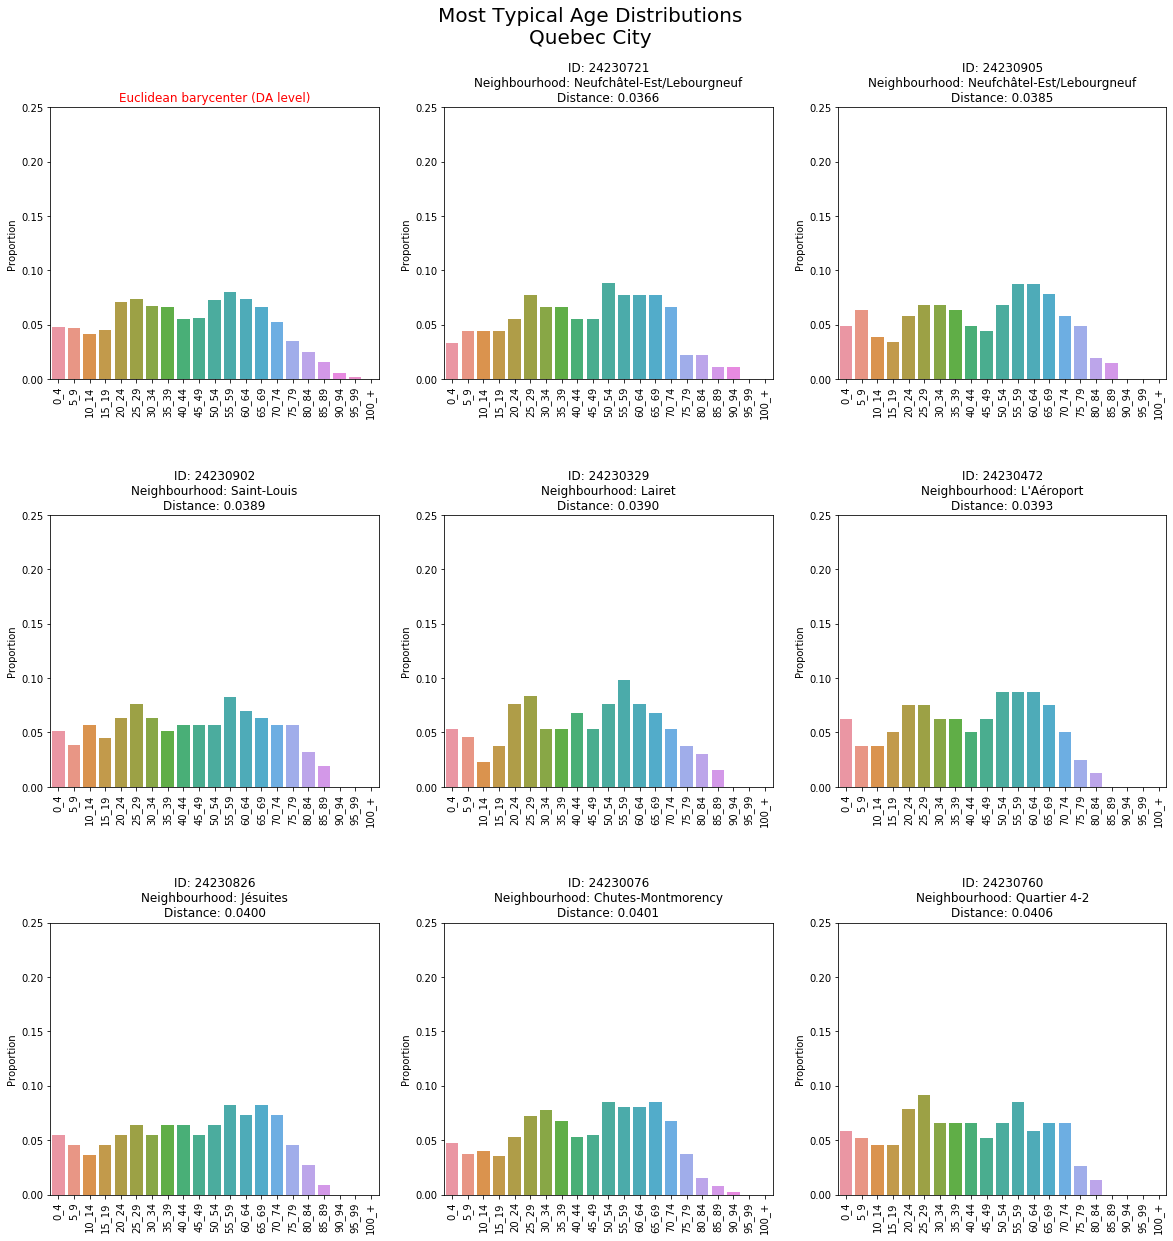

In [50]:
f=plt.figure(figsize=(20,20))
maxY=0.25
    
#The barycenter
sp=plt.subplot(3,3,1)
ax=sns.barplot(  x=LIST_AGE_COLS, y= euclBaryGlobal.values.ravel() )
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(label="Euclidean barycenter (DA level)", fontname="DejaVu Sans",color="red")
plt.ylim(0,maxY)
ax.set( ylabel='Proportion')
    
#Now the rest of the neighourhoods
for k  in range(8):
    dfSubset = dfGeoClean.iloc[k,]
    sp=plt.subplot(3,3,k+1+1)
    ax=sns.barplot(  x=LIST_AGE_COLS, y= dfSubset[LIST_AGE_COLS]   )
    
    ax.set( ylabel='Proportion')
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    n=  dfGeoClean.iloc[k,]["NOM"]
    geoid =  dfGeoClean.iloc[k,]["GeoUID"]
    dist=dfGeoClean.iloc[k,]["distToBarycenter"]
    
    plt.title(label=f"ID: {geoid}\nNeighbourhood: {n}\nDistance: {dist:.4f}")
    plt.ylim(0,maxY)
    
    #Truncated bar: add a label
    for i in range(dfSubset[LIST_AGE_COLS].shape[0]):
        prop = dfSubset[LIST_AGE_COLS][k]
        age=LIST_AGE_COLS[k]
        if prop > maxY:
            ax.text(age, maxY-0.02, round(prop,2))



plt.subplots_adjust(hspace=0.5)
_ = plt.suptitle(f"Most Typical Age Distributions\n{city}", fontsize=20 , y=0.95, x=0.5)

f.savefig( Path(DATA_PATH) /".."/ "Figures" / "Extremal" / f"euclAgePyramidExtremalByDATypical_{city}.png")

## Write the shp files 

In [51]:
dfExtreme = dfGeoClean.iloc[:10 , ]
dfExtreme.to_file(Path(DATA_PATH) /".." /  "Data" / "Extremal" / city / 'shpMostSimilarEucl' / 'shpMostSimilarEucl.shp', driver='ESRI Shapefile')

## Most different (largest  distance)

In [65]:
dfGeoClean.sort_values(by="distToBarycenter", inplace=True,ascending=False)
dfGeoClean.head(8)

ShapeAr Type  Dwllngs  Hoshlds    GeoUID  Popultn CD_UID  CSD_UID  \
438  0.09639   DA      526      325  24230254      578   2423  2423027   
412  0.39562   DA      600      374  24230253      624   2423  2423027   
439  0.06685   DA      465      309  24230255      404   2423  2423027   
682  0.11522   DA      812      542  24230911      832   2423  2423027   
435  0.67396   DA      608      432  24230259      665   2423  2423027   
768  0.69091   DA      571      381  24231114      562   2423  2423027   
848  0.16324   DA      520      499  24230204     1182   2423  2423027   
563  0.03539   DA      252      218  24230594      366   2423  2423027   

         CT_UID CMA_UID  ...     85_89     90_94     95_99  100_+    ID  \
438  4210116.00   24421  ...  0.000000  0.000000  0.000000    0.0   3.0   
412  4210116.00   24421  ...  0.007937  0.000000  0.000000    0.0   3.0   
439  4210116.00   24421  ...  0.000000  0.000000  0.000000    0.0   3.0   
682  4210116.00   24421  ...  0.005988  0.000000  0.000000    0.0   3.0   
435  4210116.00   24421  ...  0.007519  0.007519  0.000000    0.0   3.0   
768  4210116.00   24421  ...  0.000000  0.000000  0.000000    0.0   3.0   
848  4210001.01   24421  ...  0.192982  0.065789  0.030702    0.0  29.0   
563  4210118.00   24421  ...  0.000000  0.000000  0.000000    0.0  16.0   

                    NOM     SUPERFI   PERIMET  \
438  Cité Universitaire  7965511.15  12307.99   
412  Cité Universitaire  7965511.15  12307.99   
439  Cité Universitaire  7965511.15  12307.99   
682  Cité Universitaire  7965511.15  12307.99   
435  Cité Universitaire  7965511.15  12307.99   
768  Cité Universitaire  7965511.15  12307.99   
848     Saint-Sacrement  1704410.61   6348.50   
563             Plateau  3558873.68   8403.63   

                                              geometry  distToBarycenter  
438  POLYGON ((-212226.8792348948 314844.6559979331...          0.551542  
412  POLYGON ((-212358.717210689 314883.4970550715,...          0.439172  
439  POLYGON ((-212134.3466959639 314647.7708113164...          0.399468  
682  POLYGON ((-211323.4349337647 314406.9321107412...          0.369684  
435  POLYGON ((-211696.1336524234 313407.1652471761...          0.344630  
768  POLYGON ((-210999.9659284964 315025.1783262057...          0.335999  
848  POLYGON ((-209615.1251973771 315254.1646805764...          0.315145  
563  POLYGON ((-214456.6973949757 313462.5763412733...          0.303473  

[8 rows x 39 columns]

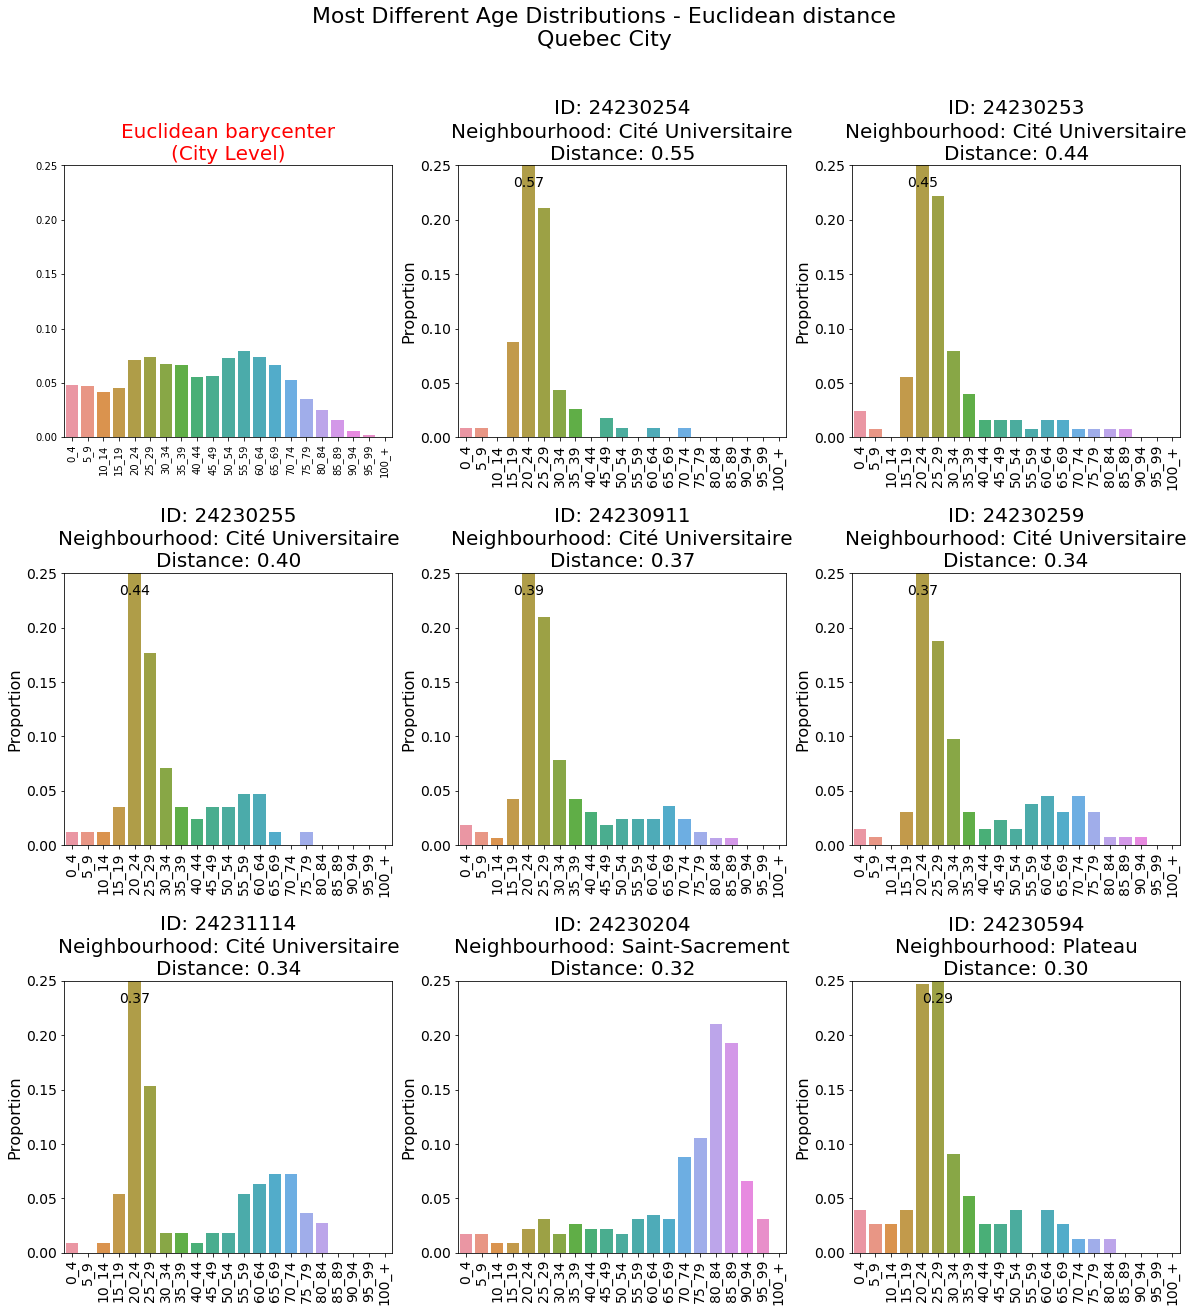

In [53]:
f=plt.figure(figsize=(20,20))
maxY=0.25
    
#Params
sizeLabels=16
sizeTicks=14
sizeText=sizeTicks
sizeSubtitle=20
sizeLargeTitle=22
    
#The barycenter => first subplot
sp=plt.subplot(3,3,1)
ax=sns.barplot(  x=LIST_AGE_COLS, y= euclBaryGlobal.values.ravel() )
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(label="Euclidean barycenter\n(City Level)", fontname="DejaVu Sans",color="red",fontsize=sizeSubtitle)
plt.ylim(0,maxY)

    
#Now the rest of the neighourhoods
for k  in range(8):
    
    #Subset on DA + barplot
    dfSubset = dfGeoClean.iloc[k,]
    sp=plt.subplot(3,3,k+1+1)
    ax=sns.barplot(  x=LIST_AGE_COLS, y= dfSubset[LIST_AGE_COLS]   )
    
    #Labels
    #ax.set( ylabel='Proportion')
    plt.ylabel( ylabel='Proportion', fontsize=sizeLabels)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=sizeTicks)
    _ = ax.tick_params(labelsize=sizeTicks)
    
    n=  dfGeoClean.iloc[k,]["NOM"]
    geoid =  dfGeoClean.iloc[k,]["GeoUID"]
    dist=dfGeoClean.iloc[k,]["distToBarycenter"]
    plt.title(label=f"ID: {geoid}\nNeighbourhood: {n}\nDistance: {dist:.2f}",fontsize=sizeSubtitle)
    plt.ylim(0,maxY)

    #Truncated bar: add a label for bars that are over maxY
    for i in range(dfSubset[LIST_AGE_COLS].shape[0]):
        prop = dfSubset[LIST_AGE_COLS][i]
        if prop > maxY:
            ax.text(i, maxY-0.02, round(prop,2),ha="center",fontsize=sizeText)

plt.subplots_adjust(hspace=0.5)
_ = plt.suptitle(f"Most Different Age Distributions - Euclidean distance\n{city}", fontsize=sizeLargeTitle , y=0.99, x=0.5)

f.savefig( Path(DATA_PATH) /".."/ "Figures" / "Extremal" / f"euclAgePyramidExtremalByDADissimilar_{city}.png")

## Write the csv of extreme

In [54]:
pathCsv = Path(DATA_PATH) /".." /  "Data" /  "Csv" / city / f'euclDiff_{city}.csv' 
dfGeoClean.iloc[:8].to_csv(pathCsv)

## Write the shp files 

In [55]:
dfExtreme = dfGeoClean.iloc[:10 , ]
dfExtreme.to_file(Path(DATA_PATH) /".." /  "Data" / "Extremal" / city / 'shpMostDifferentEucl' / 'shpMostDifferentEucl.shp', driver='ESRI Shapefile')